# Laboratorio 3

- Mark Albrand
- Jimena Hernández
- Javier Ramírez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
nRows,nCols,nDims = train_images.shape[1:]

train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)

input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 0)

print('Training data shape : ', X_train.shape, y_train.shape)
print('Validation data shape : ', X_val.shape, y_val.shape)
print('Testing data shape : ', test_data.shape, test_labels.shape)


Training data shape :  (40000, 32, 32, 3) (40000, 1)
Validation data shape :  (10000, 32, 32, 3) (10000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [5]:
dim1 = []
dim2 = []

for i in train_data:
    d1, d2 , colors = i.shape
    dim1.append(d1)
    dim2.append(d2)


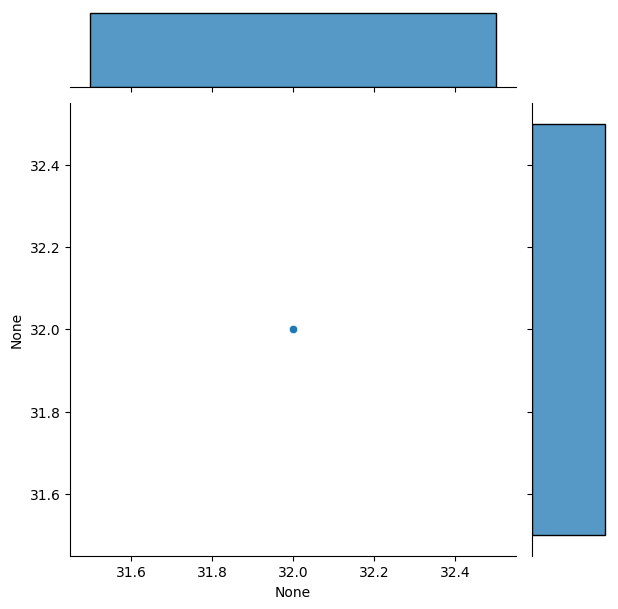

In [6]:
sns.jointplot(x = dim1, y = dim2)

### Encontrando el total de clases 

In [7]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

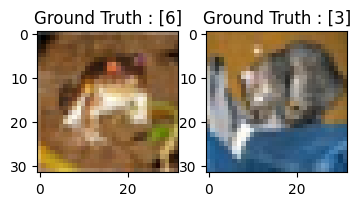

In [8]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

### Normalizando los datos

In [9]:
X_train /= 255
test_data /= 255
X_val /= 255

train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(test_labels)
val_labels_one_hot = to_categorical(y_val)

In [10]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [11]:
from keras.layers import BatchNormalization
from keras.regularizers import l2

def createModel():
    model = Sequential()
    
    model.add(Conv2D(32, (4, 4), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (4, 4), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))

    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [12]:
model1 = createModel()
batch_size = 64
epochs = 200

model1.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy', 'precision'], 
    #run_eagerly=True
)

c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [14]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 782,602 (2.99 MB)

 Trainable params: 782,346 (2.98 MB)

 Non-trainable params: 256 (1.00 KB)

In [15]:
history = model1.fit(
    X_train,
    train_labels_one_hot,
    validation_data=(X_val, val_labels_one_hot),
    batch_size=batch_size, 
    epochs=epochs, 
    #callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.3251 - loss: 4.8791 - precision: 0.5052 - val_accuracy: 0.4287 - val_loss: 2.0441 - val_precision: 0.5499
Epoch 2/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5286 - loss: 1.6703 - precision: 0.7075 - val_accuracy: 0.5964 - val_loss: 1.4841 - val_precision: 0.7345
Epoch 3/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5975 - loss: 1.5033 - precision: 0.7438 - val_accuracy: 0.6200 - val_loss: 1.4879 - val_precision: 0.7521
Epoch 4/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6345 - loss: 1.4084 - precision: 0.7679 - val_accuracy: 0.6361 - val_loss: 1.3805 - val_precision: 0.7595
Epoch 5/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6524 - loss: 1.3394 - precision: 0.7792 - val_accuracy: 0.6559 - val_loss: 1.2904 - val_precision: 0.7763
Epoch 6/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6729 - loss: 1.2652 - precision: 0.7891 - val_accuracy: 

<Axes: >

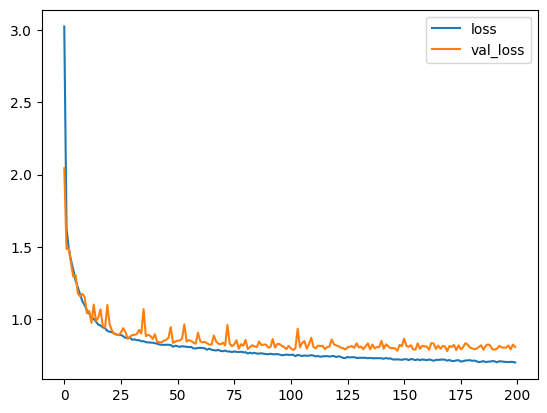

In [16]:
perdidas = pd.DataFrame(model1.history.history)
perdidas[['loss','val_loss']].plot()

Text(0.5, 1.0, 'Accuracy Curves')

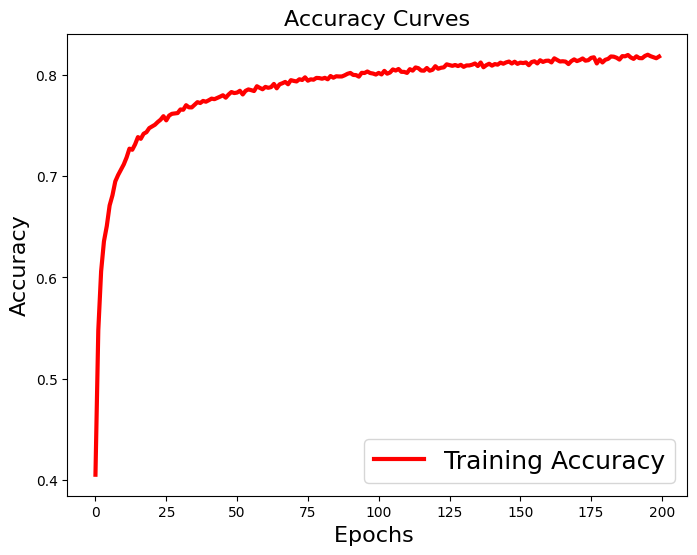

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [18]:
model1.evaluate(test_data, test_labels_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7881 - loss: 0.8050 - precision: 0.8351


[0.807029664516449, 0.7886999845504761, 0.8366726636886597]

In [19]:
predictions = model1.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


0 - Avion  
1 - Carros  
2 - Pajaro  
3 - Gatos  
4 - Venado  
5 - Perros  
6 - Ranas  
7 - Caballos  
8 - Botes  
9 - Camiones  

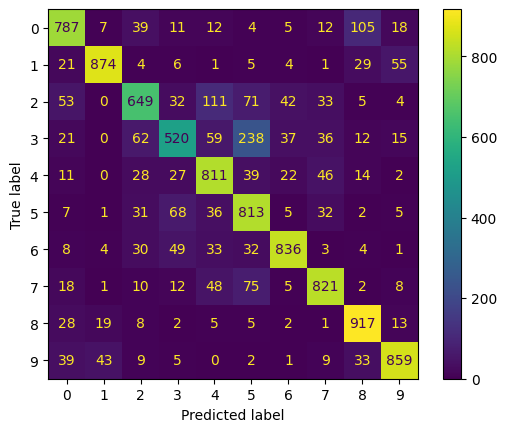

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1))

ConfusionMatrixDisplay(cm).plot()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.92      0.87      0.90      1000
           2       0.75      0.65      0.69      1000
           3       0.71      0.52      0.60      1000
           4       0.73      0.81      0.77      1000
           5       0.63      0.81      0.71      1000
           6       0.87      0.84      0.85      1000
           7       0.83      0.82      0.82      1000
           8       0.82      0.92      0.86      1000
           9       0.88      0.86      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

